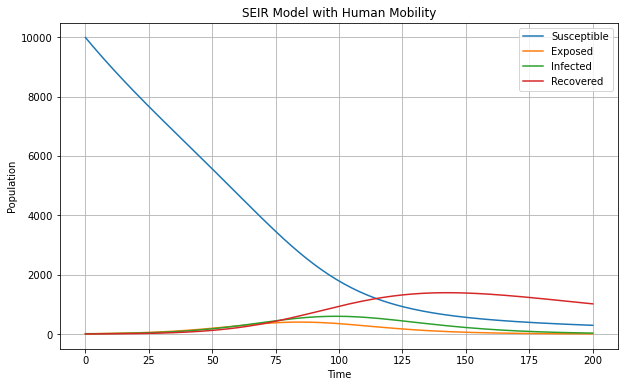

In [1]:
#Compartmental models are a very general modelling technique. 
#They are often applied to the mathematical modelling of infectious diseases. 
#The population is assigned to compartments with labels – for example, S, I, or R, (Susceptible, Infectious, or Recovered). 
#People may progress between compartments.

#To simulate an SEIR model with human mobility, you can use numerical integration methods like Euler's method or
#Runge-Kutta methods. 
#For simplicity, I will demonstrate the simulation using Euler's method. 
#Please note that this code provides a basic framework and does not include data integration or calibration.
#Additionally, the model's parameters (such as transmission rate, recovery rate, etc.) should be adjusted according to 
#the specific characteristics of Dengue and the urban system under study.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 10000
initial_infected = 10
beta = 0.3  # Transmission rate
sigma = 0.1  # Exposed to Infectious rate
gamma = 0.05  # Recovery rate
mu = 0.01  # Mobility rate (fraction of population moving between compartments)

# Time parameters
t_max = 200
dt = 1
t_values = np.arange(0, t_max+dt, dt)

# Initialize arrays to store the population compartments
S = np.zeros(len(t_values))
E = np.zeros(len(t_values))
I = np.zeros(len(t_values))
R = np.zeros(len(t_values))

# Initial conditions
S[0] = population_size - initial_infected
E[0] = 0
I[0] = initial_infected
R[0] = 0

# Euler's method for numerical integration
for i in range(1, len(t_values)):
    # Calculate changes in each compartment
    dS = -beta * S[i-1] * I[i-1] / population_size
    dE = beta * S[i-1] * I[i-1] / population_size - sigma * E[i-1]
    dI = sigma * E[i-1] - gamma * I[i-1]
    dR = gamma * I[i-1]

    # Incorporate human mobility
    S[i] = S[i-1] + (1 - mu) * dS * dt
    E[i] = E[i-1] + (1 - mu) * dE * dt
    I[i] = I[i-1] + (1 - mu) * dI * dt
    R[i] = R[i-1] + (1 - mu) * dR * dt

    # Update the compartments for the population that moved (mu fraction)
    S[i] -= mu * S[i-1]
    E[i] -= mu * E[i-1]
    I[i] -= mu * I[i-1]
    R[i] -= mu * R[i-1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, label='Susceptible')
plt.plot(t_values, E, label='Exposed')
plt.plot(t_values, I, label='Infected')
plt.plot(t_values, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SEIR Model with Human Mobility')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#In this code, the SEIR model is simulated for a population of size population_size over a time span of t_max
#with a time step of dt. The initial number of infected individuals is set to initial_infected. 
#The Euler's method is used for numerical integration, and the human mobility factor mu is incorporated 
#into the model by updating the compartments for the fraction of the population that moves between compartments. 
#Note that this is a basic example, and in a real-world scenario, you would need to adjust the parameters and 
#implement more complex mobility patterns and data integration techniques.